<a href="https://colab.research.google.com/github/swilsonmfc/timeseries/blob/master/NBeats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-BEATS

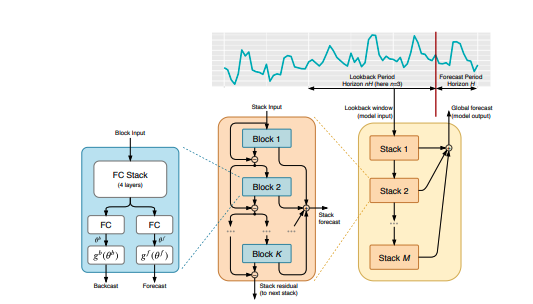

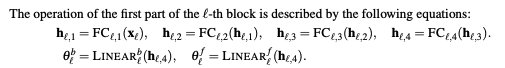

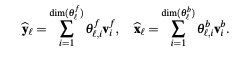

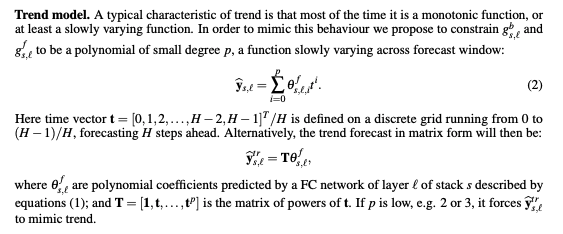

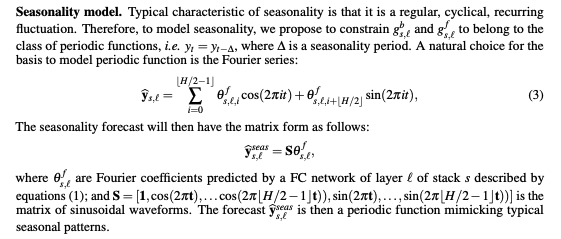

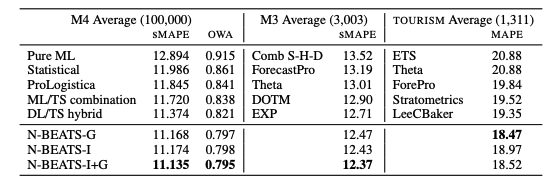

# Install

In [ ]:
!pip install darts
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, mae
from darts.utils.likelihood_models import LaplaceLikelihood
from darts.datasets import AirPassengersDataset

from darts.models import NBEATSModel
from darts.models import ExponentialSmoothing
from darts.models import AutoARIMA
from darts.models import TBATS

# Data

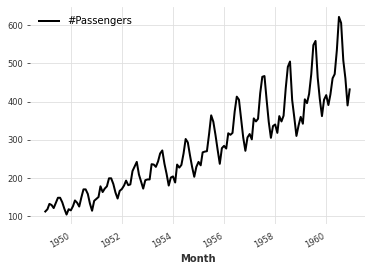

In [ ]:
pax_df = AirPassengersDataset().load()
pax_df.plot()

## Preprocess

In [ ]:
scaler_pax = Scaler()
pax_df_scaled = scaler_pax.fit_transform(pax_df)
train_pax_df, test_pax_df = pax_df_scaled[:-36], pax_df_scaled[-36:] 

# Generic

## Model

In [ ]:
model = NBEATSModel(input_chunk_length=24, 
                    output_chunk_length=12, 
                    n_epochs = 100, 
                    random_state = 2001)

In [ ]:
model.fit(train_pax_df, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


## Predict

In [ ]:
pred = model.predict(n=36, series=train_pax_df)

Predicting: 3it [00:00, ?it/s]

## Evaluate

In [ ]:
mape(pax_df_scaled , pred)

9.2531652004166

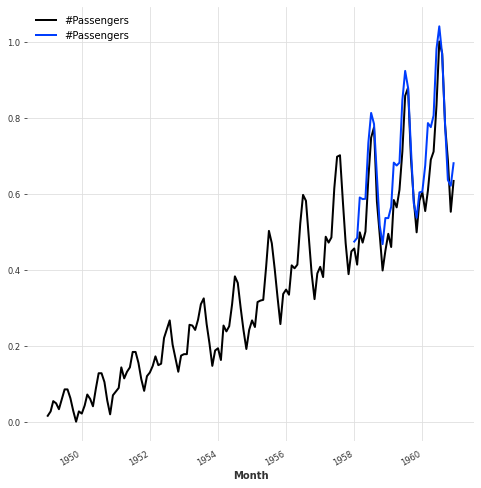

In [ ]:
fig = plt.figure(figsize=(8, 8))
pax_df_scaled.plot()
pred.plot()

# Interpretable

## Model

In [ ]:
model = NBEATSModel(input_chunk_length=24, 
                    output_chunk_length=12, 
                    generic_architecture=False,
                    n_epochs = 100, 
                    random_state = 2001)

In [ ]:
model.fit(train_pax_df, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 418 K 
---------------------------------------------------
411 K     Trainable params
6.7 K     Non-trainable params
418 K     Total params
3.349     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


## Predict

In [ ]:
pred = model.predict(n=36, series=train_pax_df)

Predicting: 3it [00:00, ?it/s]

## Evaluate

In [ ]:
mape(pax_df_scaled, pred)

11.346284729519612

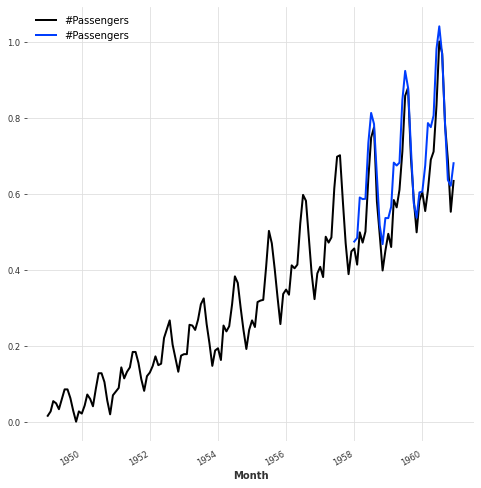

In [ ]:
fig = plt.figure(figsize=(8, 8))
pax_df_scaled.plot()
pred.plot()

In [ ]:
model.model

_NBEATSModule(
  (criterion): MSELoss()
  (train_metrics): MetricCollection,
    prefix=train_
  )
  (val_metrics): MetricCollection,
    prefix=val_
  )
  (stacks): ModuleList(
    (0): _Stack(
      (blocks): ModuleList(
        (0): _Block(
          (activation): ReLU()
          (fc_stack): ModuleList(
            (0): Linear(in_features=24, out_features=256, bias=True)
            (1): Linear(in_features=256, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=256, bias=True)
          )
          (backcast_linear_layer): Linear(in_features=256, out_features=3, bias=True)
          (forecast_linear_layer): Linear(in_features=256, out_features=6, bias=True)
          (backcast_g): _TrendGenerator()
          (forecast_g): _TrendGenerator()
        )
      )
    )
    (1): _Stack(
      (blocks): ModuleList(
        (0): _Block(
          (activation): ReLU()
          (fc_stack): M

# Compare

In [ ]:
def evaluate(model, train=train_pax_df, test=test_pax_df):
    model.fit(train)
    pred = model.predict(n=36)
    print(f'Model {model}')
    print(f'      MAPE: {mape(test, pred):.2f}%')

evaluate(ExponentialSmoothing())
evaluate(AutoARIMA())
evaluate(TBATS())
evaluate (NBEATSModel(input_chunk_length=24, 
                    output_chunk_length=12, 
                    n_epochs = 100, 
                    random_state = 2001))


Model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12
      MAPE: 8.04%
Model Auto-ARIMA
      MAPE: 16.21%
Model (T)BATS
      MAPE: 18.82%


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting: 3it [00:00, ?it/s]

Model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7fe067a3f790>
      MAPE: 10.97%
